In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df_net = pd.read_csv(
    "dataset/Original/global/global-genre_network-2018.csv",
    sep="\t"
)

df_net.head()


,source,target,weight,avg_streams
0,pop rap,rap,322,6.079237e+07
1,rap,trap,312,6.711390e+07
2,hip hop,rap,280,6.167660e+07
3,latin,reggaeton,236,1.165257e+08
4,pop rap,trap,235,5.516126e+07


- source = first genre
- target = second genre
- weight = how many successful collaborations exist between them
- avg_streams = average number of streams for tracks using this pair

## Data Validation

In [3]:
print("Missing values:")
print(df_net.isnull().sum())

print("\nDuplicate rows:", df_net.duplicated().sum())


Missing values:
source         0
target         0
weight         0
avg_streams    0
dtype: int64

Duplicate rows: 0


## Collaboration Network Construction

In [4]:
G = nx.from_pandas_edgelist(
    df_net,
    source="source",
    target="target",
    edge_attr=["weight", "avg_streams"]
)

## Network Overview

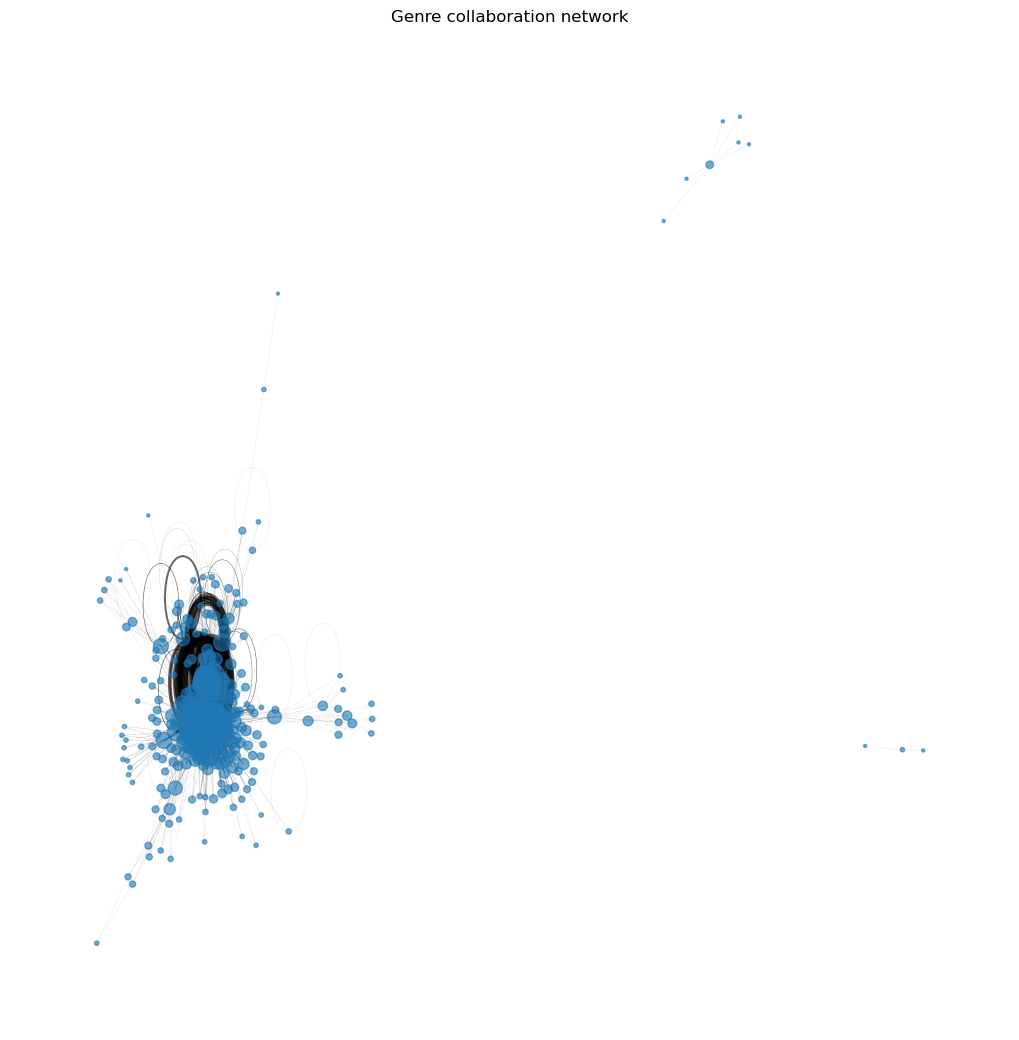

In [5]:
plt.figure(figsize=(10,10))

pos = nx.spring_layout(G, seed=42)

node_sizes = [G.degree(n)*5 for n in G.nodes()]
edge_widths = [G[u][v]["weight"]/20 for u,v in G.edges()]

nx.draw(
    G,
    pos,
    node_size=node_sizes,
    width=edge_widths,
    with_labels=False,
    alpha=0.6
)

plt.title("Genre collaboration network")
plt.show()


In [6]:
avg_degree = sum(dict(G.degree()).values()) / G.number_of_nodes()
weighted_degrees = dict(G.degree(weight="weight"))
avg_weighted_degree = sum(weighted_degrees.values()) / G.number_of_nodes()


components = list(nx.connected_components(G))
largest_component_size = len(max(components, key=len))
total_nodes = G.number_of_nodes()
percentage_in_largest = (largest_component_size / total_nodes) * 100
disconnected_nodes = total_nodes - largest_component_size
percentage_disconnected = (disconnected_nodes / total_nodes) * 100



print("Nodes:", G.number_of_nodes())
print("Edges:", G.number_of_edges())
print("Density:", nx.density(G))
print("Average degree:", avg_degree)
print("Average weighted degree:", avg_weighted_degree)
print("Connected components:", nx.number_connected_components(G))
print("Largest component size:", largest_component_size)
print("Percentage in largest component:", round(percentage_in_largest, 2), "%")
print("Disconnected nodes:", disconnected_nodes)
print("Percentage disconnected:", round(percentage_disconnected, 2), "%")


Nodes: 295
Edges: 2856
Density: 0.06585956416464891
Average degree: 19.36271186440678
Average weighted degree: 120.54915254237288
Connected components: 3
Largest component size: 285
Percentage in largest component: 96.61 %
Disconnected nodes: 10
Percentage disconnected: 3.39 %


## Network Structure Analysis

#### Node Degree Distirbution

In [7]:
degrees = [deg for _,deg in G.degree()]
pd.Series(degrees).describe()


count    295.000000
mean      19.362712
std       26.603168
min        1.000000
25%        4.500000
50%       10.000000
75%       22.000000
max      171.000000
dtype: float64

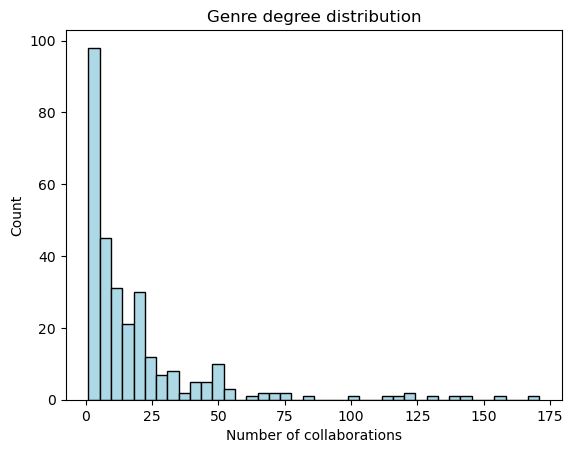

In [8]:

plt.hist(degrees, bins=40, color = "lightblue", edgecolor = "black")
plt.title("Genre degree distribution")
plt.xlabel("Number of collaborations")
plt.ylabel("Count")
plt.show()


#### Edge Weight Distirbution

In [9]:
weights = [d["weight"] for _,_,d in G.edges(data=True)]
pd.Series(weights).describe()


count    2856.000000
mean        6.225840
std        20.285056
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max       322.000000
dtype: float64

Most genre pairs occur very few times (1–4)

A small number of pairs occur a lot (up to 322)

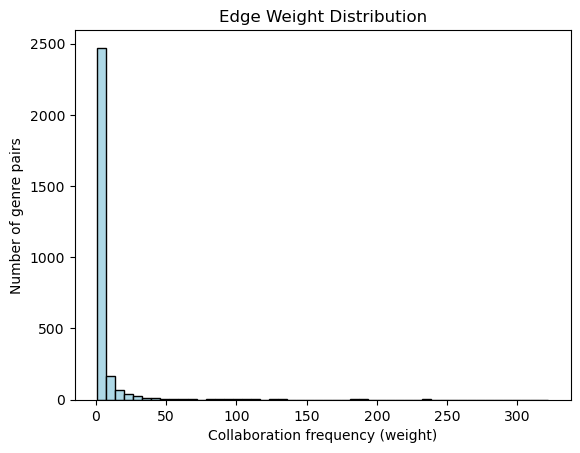

In [10]:
weights = [d["weight"] for _, _, d in G.edges(data=True)]
w = pd.Series(weights)

plt.figure()
plt.hist(w, bins=50, color = "lightblue", edgecolor = "black")
plt.title("Edge Weight Distribution")
plt.xlabel("Collaboration frequency (weight)")
plt.ylabel("Number of genre pairs")
plt.show()


#### Popularity Distribution

In [11]:
streams = [d["avg_streams"] for _,_,d in G.edges(data=True)]
pd.Series(streams).describe()


count    2.856000e+03
mean     8.052020e+07
std      9.134964e+07
min      3.504950e+06
25%      1.531724e+07
50%      5.304020e+07
75%      1.050503e+08
max      6.032435e+08
dtype: float64

Even the “least successful” edges in this file are still quite successful (millions of streams).

The distribution is very skewed (a few pairings are insanely successful - something we should take into consideration later, maybe even remove it(?)).

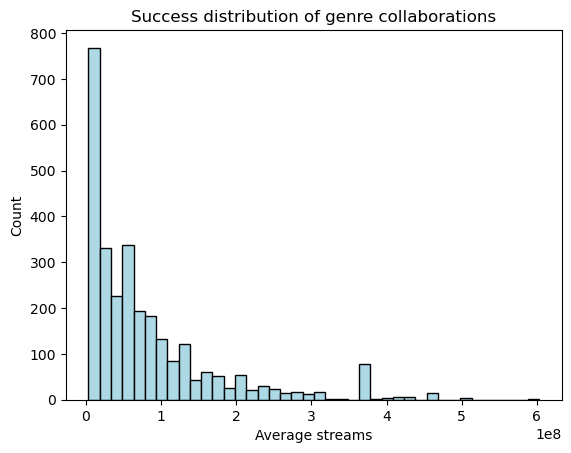

In [12]:
plt.hist(streams, bins=40, color = "lightblue", edgecolor = "black")
plt.title("Success distribution of genre collaborations")
plt.xlabel("Average streams")
plt.ylabel("Count")
plt.show()


## General Network Information

#### Top 10 genres with the highest collaboration count

In [13]:
sorted(G.degree, key=lambda x: x[1], reverse=True)[:10]


[('pop', 171),
 ('dance pop', 158),
 ('rap', 145),
 ('pop rap', 138),
 ('post-teen pop', 132),
 ('trap', 123),
 ('hip hop', 121),
 ('tropical house', 118),
 ('edm', 112),
 ('southern hip hop', 102)]

#### Top 10 most frequently collaborating genres

In [14]:
sorted(G.edges(data=True), key=lambda x: x[2]["weight"], reverse=True)[:10]


[('pop rap', 'rap', {'weight': 322, 'avg_streams': 60792372.76666666}),
 ('rap', 'trap', {'weight': 312, 'avg_streams': 67113897.11029412}),
 ('rap', 'hip hop', {'weight': 280, 'avg_streams': 61676604.91452991}),
 ('latin', 'reggaeton', {'weight': 236, 'avg_streams': 116525686.64615384}),
 ('pop rap', 'trap', {'weight': 235, 'avg_streams': 55161259.58928572}),
 ('dance pop', 'pop', {'weight': 234, 'avg_streams': 98663839.86324786}),
 ('rap', 'rap', {'weight': 214, 'avg_streams': 62760373.27338129}),
 ('pop rap', 'hip hop', {'weight': 205, 'avg_streams': 53978769.20652174}),
 ('pop', 'pop', {'weight': 193, 'avg_streams': 105582088.89855072}),
 ('pop', 'post-teen pop', {'weight': 191, 'avg_streams': 92400636.92727272})]

#### Top 10 most successful collaboraitons 

In [15]:
sorted(G.edges(data=True), key=lambda x: x[2]["avg_streams"], reverse=True)[:10]


[('tropical house', 'brostep', {'weight': 1, 'avg_streams': 603243524.0}),
 ('canadian pop', 'vapor trap', {'weight': 1, 'avg_streams': 501748984.0}),
 ('canadian hip hop', 'vapor trap', {'weight': 1, 'avg_streams': 501748984.0}),
 ('toronto rap', 'vapor trap', {'weight': 1, 'avg_streams': 501748984.0}),
 ('pop rap', 'uk contemporary r&b', {'weight': 1, 'avg_streams': 464752858.0}),
 ('dance pop',
  'uk contemporary r&b',
  {'weight': 2, 'avg_streams': 464752858.0}),
 ('pop', 'uk contemporary r&b', {'weight': 2, 'avg_streams': 464752858.0}),
 ('post-teen pop', 'neo soul', {'weight': 1, 'avg_streams': 464752858.0}),
 ('post-teen pop',
  'uk contemporary r&b',
  {'weight': 1, 'avg_streams': 464752858.0}),
 ('tropical house',
  'uk contemporary r&b',
  {'weight': 2, 'avg_streams': 464752858.0})]

it means that collaboration frequency is not equal to popularity